In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("wo_men.csv")
data.head()

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40
1,04.10.2016 17:58:59,woman,171.0,39
2,04.10.2016 18:00:15,woman,174.0,39
3,04.10.2016 18:01:17,woman,176.0,40
4,04.10.2016 18:01:22,man,195.0,46


In [5]:
shoe_sizes = np.array(data["shoe_size"])
n = len(shoe_sizes)

In [6]:
# building variation series
shoe_sizes = np.sort(shoe_sizes)
print("Variation series:\n", shoe_sizes)
print(f"{len(shoe_sizes)} elements")

Variation series:
 [35 35 36 36 36 36 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39
 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 41 41 41 41 41 41 41 41 41 41 41 41 41 42 42 42 42 42 42 42
 42 42 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 44 44 44 44 44 45 45
 45 45 45 45 45 45 45 45 46 46 46 46 47 47 47 48]
160 elements


In [7]:
# frequency distribution table
from IPython.display import display, HTML
unique_sizes, unique_counts = np.unique(shoe_sizes, return_counts = True)
df_dict = {unique_sizes[i]:unique_counts[i] for i in range(len(unique_sizes))} 
df_dict["Sum"] = np.sum(unique_counts)
cols=[unique_sizes[i] for i in range(len(unique_sizes))]
cols.append("Sum")
df = pd.DataFrame(df_dict, columns=cols, index=["Ni"])
print("\t\tFrequency distribution table")
display(df)

		Frequency distribution table


,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Sum
Ni,2,9,18,33,21,17,13,9,6,14,10,4,3,1,160


Text(0.5, 1.0, 'Frequency diagram')

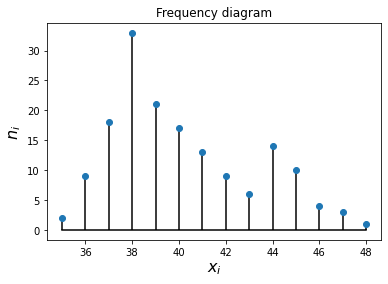

In [8]:
# visualization
plt.stem(unique_sizes, unique_counts, linefmt='-k', basefmt='-k')
plt.xlabel("$x_i$", fontsize=16)
plt.ylabel("$n_i$", fontsize=16)
plt.title("Frequency diagram")

Text(0.5, 1.0, 'Frequency polygon')

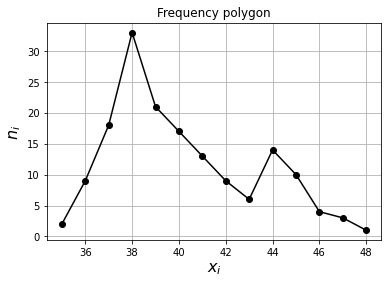

In [9]:
plt.plot(unique_sizes, unique_counts, '-o', color="k")
plt.grid()
plt.xlabel("$x_i$", fontsize=16)
plt.ylabel("$n_i$", fontsize=16)
plt.title("Frequency polygon")

In [10]:
# ECDF
freq_cumul = np.cumsum(unique_counts)
freq_cumul = freq_cumul / n
def output_func(sizes, results):
    print(f"{0:.3f}, x < {sizes[0]}")
    for i in range(len(sizes)-1):
        print(f"{results[i]:.3f}, xє[{sizes[i]}, {sizes[i+1]})")
    print(f"{results[-1]:.3f}, x >= {sizes[-1]}")
print("F(x):")        
output_func(unique_sizes, freq_cumul) 

F(x):
0.000, x < 35
0.013, xє[35, 36)
0.069, xє[36, 37)
0.181, xє[37, 38)
0.388, xє[38, 39)
0.519, xє[39, 40)
0.625, xє[40, 41)
0.706, xє[41, 42)
0.762, xє[42, 43)
0.800, xє[43, 44)
0.887, xє[44, 45)
0.950, xє[45, 46)
0.975, xє[46, 47)
0.994, xє[47, 48)
1.000, x >= 48


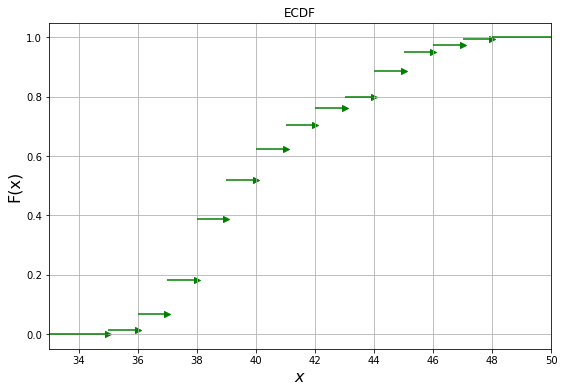

In [11]:
# ECDF plot

y_coord = np.insert(freq_cumul, 0, 0)

x_mins = np.copy(unique_sizes)
x_mins = np.insert(x_mins, 0, -400)

x_maxs = np.copy(unique_sizes)
x_maxs = np.append(x_maxs, 5000)
plt.figure(figsize=(9,6))
plt.hlines(y_coord, xmin=x_mins, xmax=x_maxs, colors='green')
plt.title("ECDF")
plt.grid()
plt.xlabel("$x$", fontsize=16)
plt.ylabel("F(x)", fontsize=16)
plt.xlim([33,50])
plt.ylim()

y1 = np.delete(y_coord, -1)
x1 = np.copy(unique_sizes)
plt.scatter(x1, y1, marker='>', color='green')


In [17]:
# location characteristics
from scipy import stats
print(f"Median = {np.median(shoe_sizes)}")
print(f"Mode = {stats.mode(shoe_sizes)[0]}")
mean = np.mean(shoe_sizes)
print(f"Mean = {mean}")
squares_for_dev = np.copy(shoe_sizes) - mean
squares_for_dev = squares_for_dev ** 2 
deviation = np.sum(squares_for_dev)
print(f"Deviation = {deviation}")

Median = 39.0
Mode = [38]
Mean = 40.13125
Deviation = 1438.24375


In [18]:
# spread characteristics
range_ = np.max(shoe_sizes) - np.min(shoe_sizes)
print(f"Range = {range_}")
s2 = np.var(shoe_sizes, ddof=1)
print(f"Variance = {s2}")
D = np.var(shoe_sizes, ddof=0)
print(f"Dispersion = {D}")
std = np.std(shoe_sizes, ddof=1)
print(f"Std = {std}")
cv = std / mean
print(f"Coefficient of variation (CV) = {cv}")
quartiles = [np.percentile(shoe_sizes, 25*i) for i in range(1,4)]
for i in range(len(quartiles)):
    print(f"Q{i+1} = {quartiles[i]}")
print(f"Interquartile range = {quartiles[-1] - quartiles[0]}")
deciles = [np.percentile(shoe_sizes, 10*i) for i in range(1,10)]
for i in range(len(deciles)):
    print(f"D{i+1} = {deciles[i]}")
print(f"Interdecile range = {deciles[-1] - deciles[0]}")
if n % 100 == 0:
    centiles = [np.percentile(shoe_sizes, i) for i in range(1,100)]
    for i in range(len(centiles)):
        print(f"C{i+1} = {centiles[i]}")
    print(f"Intercentile range = {centiles[-1] - centiles[0]}")

Range = 13
Variance = 9.045558176100629
Dispersion = 8.9890234375
Std = 3.00758344457816
Coefficient of variation (CV) = 0.0749436771737277
Q1 = 38.0
Q2 = 39.0
Q3 = 42.0
Interquartile range = 4.0
D1 = 37.0
D2 = 38.0
D3 = 38.0
D4 = 39.0
D5 = 39.0
D6 = 40.0
D7 = 41.0
D8 = 43.2
D9 = 45.0
Interdecile range = 8.0


In [19]:
# form characteristics
def st_moment(k, arr):
    m = 0
    for i in range(len(arr)):
        m += arr[i]**(k)
    return m / n
def centr_moment(k, mean, arr):
    mu = 0
    for i in range(len(arr)):
        mu += (arr[i]-mean)**(k)
    return mu / n
st_moments = [st_moment(i, shoe_sizes) for i in range(5)]
centr_moments = [centr_moment(i, mean, shoe_sizes) for i in range(5)]
print("Moments (c=0):")
for i in range(len(st_moments)):
    print(f"m{i} = {st_moments[i]}")
print("Central moments:")
for i in range(len(centr_moments)):
    print(f"mu{i} = {round(centr_moments[i],5)}")
mu2 = centr_moments[2]
mu3 = centr_moments[3]
mu4 = centr_moments[4]

Moments (c=0):
m0 = 1.0
m1 = 40.13125
m2 = 1619.50625
m3 = 65730.75625
m4 = 2683464.25625
Central moments:
mu0 = 1.0
mu1 = 0.0
mu2 = 8.98902
mu3 = 16.46456
mu4 = 193.68296


In [20]:
skewness = mu3 / (mu2**(3/2))
print(f"Skewness = {skewness}")
if skewness > 0:
    print("Most values are on the left.")
elif skewness == 0:
    print("Symmetric")
else:
    print("Most values are on the right.")
kurtosis = mu4 / (mu2**2) - 3
print(f"Excess kurtosis = {kurtosis}")
if kurtosis > 0:
    print("Heavier tails")
elif kurtosis < 0:
    print("Light tails ")
else:
    print("Normal")
    

Skewness = 0.6109158420061312
Most values are on the left.
Excess kurtosis = -0.6030090984638656
Light tails 
